<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 45px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  3. Making Question</div>

### 3.1 Import Required Libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

### 3.2 Asking Question

#### Question 1: How do pollutant concentrations change over time?

Answering this question provides valuable insights into how pollutant levels fluctuate over different time periods, such as hours, days, months, or seasons. It helps identify patterns or trends in air quality, pinpointing times of higher pollution levels that may pose greater health risks. Additionally, understanding these changes can assist in determining the factors contributing to pollution, such as traffic, industrial activities, or weather conditions. This information is crucial for implementing targeted interventions to reduce pollution and improve air quality.

- Steps to answer this question :

    - Create a Month Column: Add a new column to the dataset representing the month extracted from the datetime column.
    - Group Data by Month and Calculate Averages: Aggregate the data by month and compute the average concentration of pollutants.
    - Visualize the results.

In [2]:
df = pd.read_csv('../Data/air_pollution_cleaned.csv')
df

,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-01 00:00:00,3,700.95,0.44,35.99,17.35,32.90,20.33,26.64,8.99
1,2021-01-01 01:00:00,3,847.82,2.46,38.04,18.06,36.24,23.32,30.54,9.37
2,2021-01-01 02:00:00,3,894.55,5.25,38.39,23.25,41.01,24.16,31.93,9.25
3,2021-01-01 03:00:00,3,827.79,6.20,36.33,33.98,43.39,23.20,30.91,8.61
4,2021-01-01 04:00:00,2,660.90,3.69,29.13,54.36,35.76,19.50,25.60,6.21
...,...,...,...,...,...,...,...,...,...,...
33808,2024-11-29 20:00:00,2,600.81,1.30,37.70,5.99,23.13,21.54,27.61,9.25
33809,2024-11-29 21:00:00,2,554.08,0.75,35.99,8.85,23.13,20.50,26.39,8.36
33810,2024-11-29 22:00:00,2,567.44,0.64,36.67,10.19,24.80,22.20,28.90,8.04
33811,2024-11-29 23:00:00,2,600.81,0.76,37.36,9.66,26.23,24.03,32.19,8.61


In [3]:
df['dt'] = pd.to_datetime(df['dt'])
# Create a copy of dataframedataframe
df0=df.copy()

In [4]:
pollutants = ['aqi', 'co', 'no', 'no2', 'pm2_5', 'pm10', 'o3', 'so2', 'nh3']
palette = sns.color_palette("husl", len(pollutants))
df0['year'] = df0['dt'].dt.year
df0['month'] =df0['dt'].dt.month

# Group by year and month to calculate monthly averages
monthly_avg = (
    df0.groupby(['year', 'month'])
    .mean(numeric_only=True)
    .reset_index()
)

# Create a date column for better visualization (e.g., Jan 2023)
monthly_avg['date'] = pd.to_datetime(
    monthly_avg[['year', 'month']].assign(day=1)
)

# List of pollutants for plotting

monthly_avg

,year,month,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,date
0,2021,1,4.280556,1122.597097,11.433903,44.051014,45.902986,50.500069,59.328667,75.461500,11.303486,2021-01-01
1,2021,2,4.419643,1215.552619,12.021652,48.128125,60.039702,56.046964,65.230685,85.290045,11.919211,2021-02-01
2,2021,3,3.178763,759.386210,7.332124,32.517231,48.422527,40.621694,29.149046,40.530349,7.951586,2021-03-01
3,2021,4,3.965278,1250.529625,18.077972,40.794903,29.289625,52.287833,51.501944,64.054792,9.540597,2021-04-01
4,2021,5,3.961022,1262.420269,21.518589,34.826022,20.992124,45.914449,50.046599,61.866183,9.284261,2021-05-01
5,2021,6,3.790278,1091.096056,10.646722,28.021750,19.260000,27.931236,43.780333,52.852778,7.975917,2021-06-01
6,2021,7,3.413978,982.802849,14.389113,25.890847,16.743145,30.560255,38.855054,46.780054,7.161344,2021-07-01
7,2021,8,3.588710,1763.566075,29.429543,34.926384,12.460860,41.675390,85.535134,97.035457,10.793938,2021-08-01
8,2021,9,3.951389,1757.768403,32.486431,34.015042,11.295069,44.731125,78.854333,91.447194,10.395375,2021-09-01
9,2021,10,4.069892,2082.089395,40.431438,39.610833,9.457715,50.863185,89.465981,104.233454,11.662191,2021-10-01


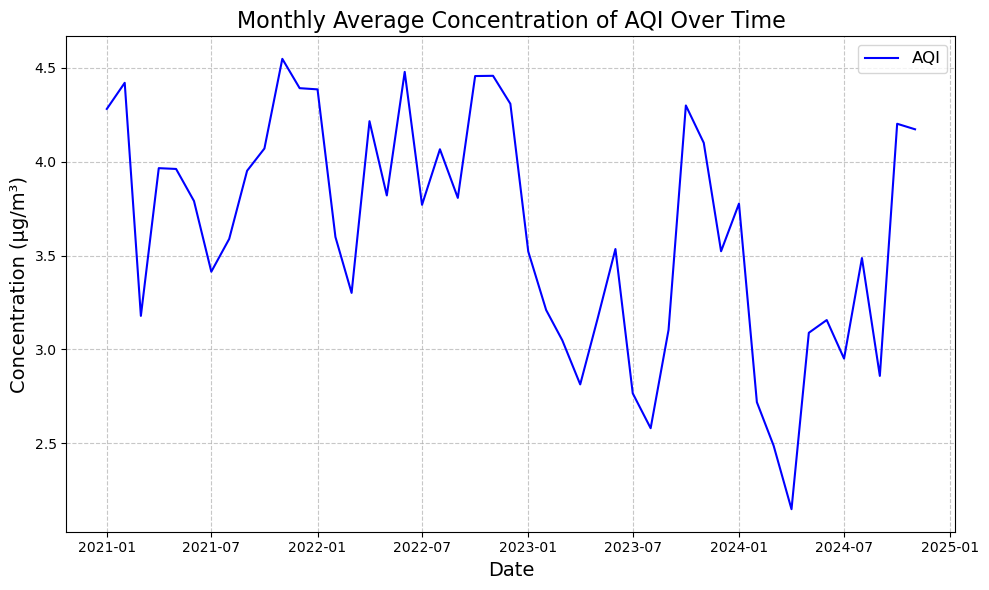

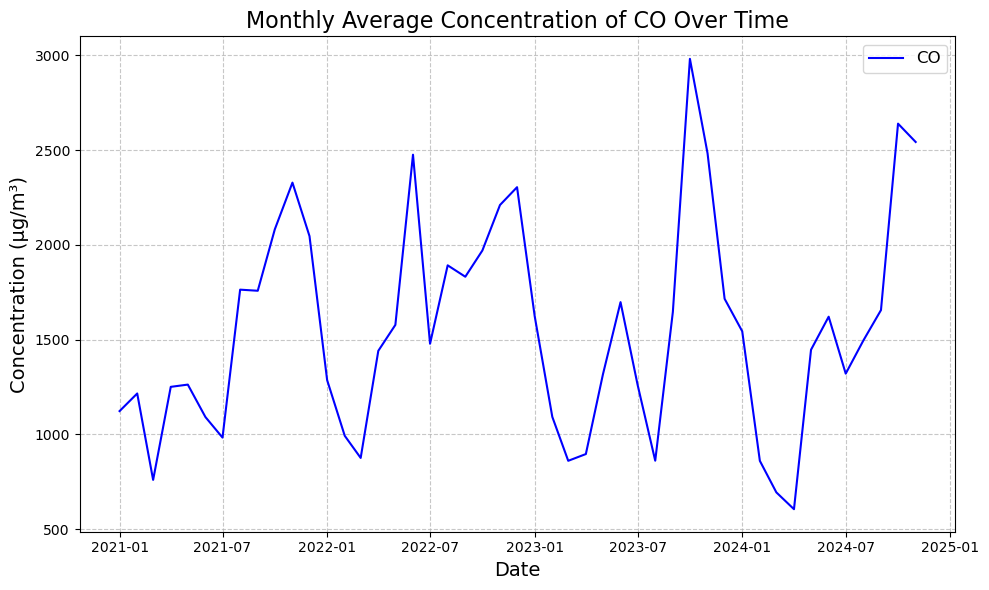

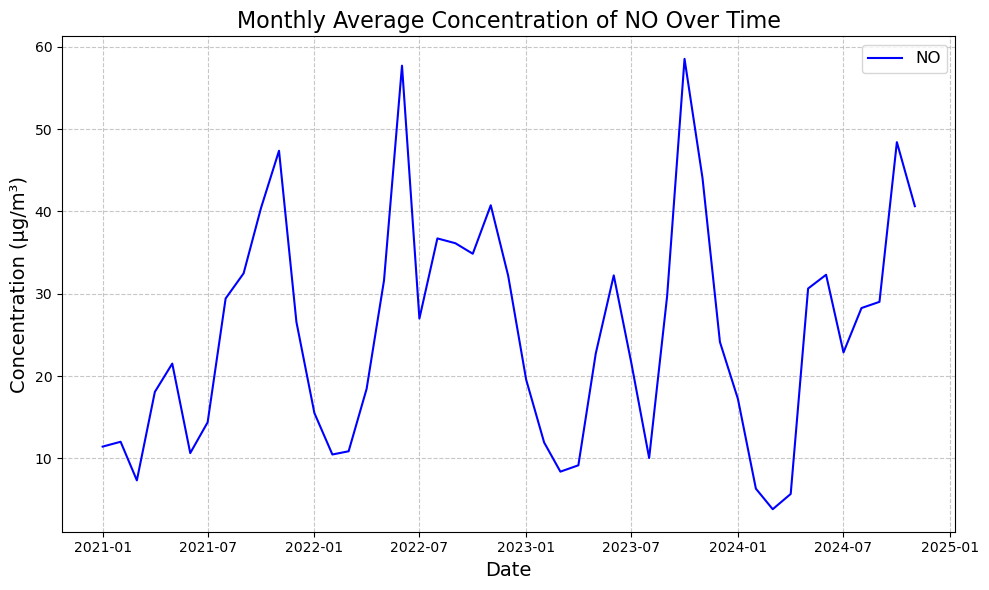

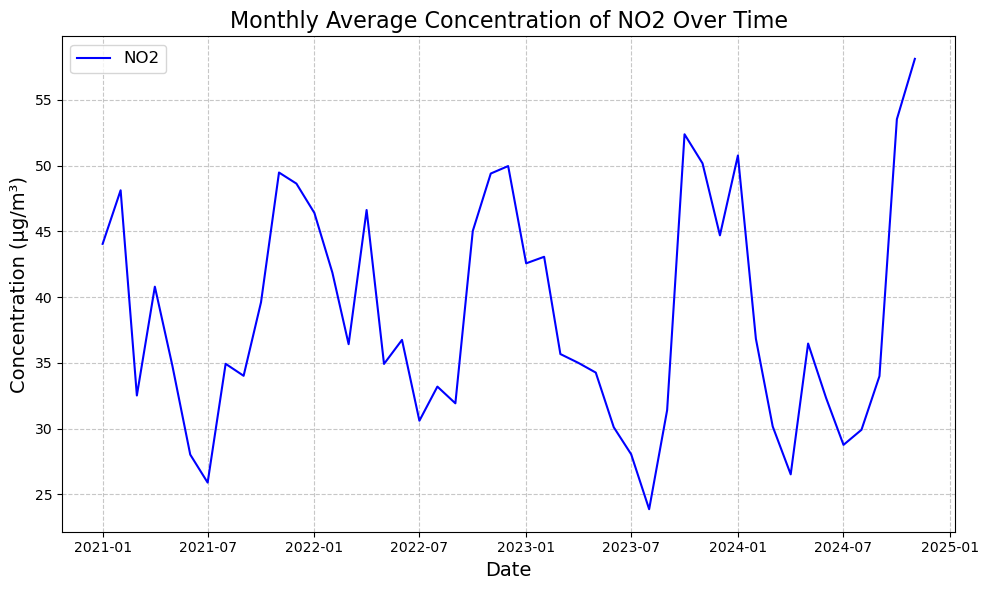

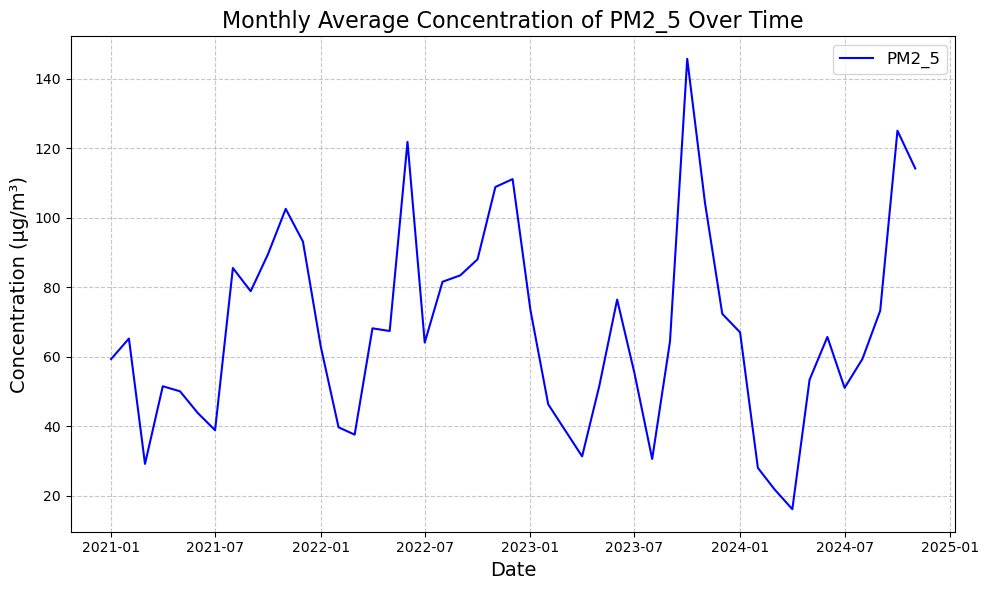

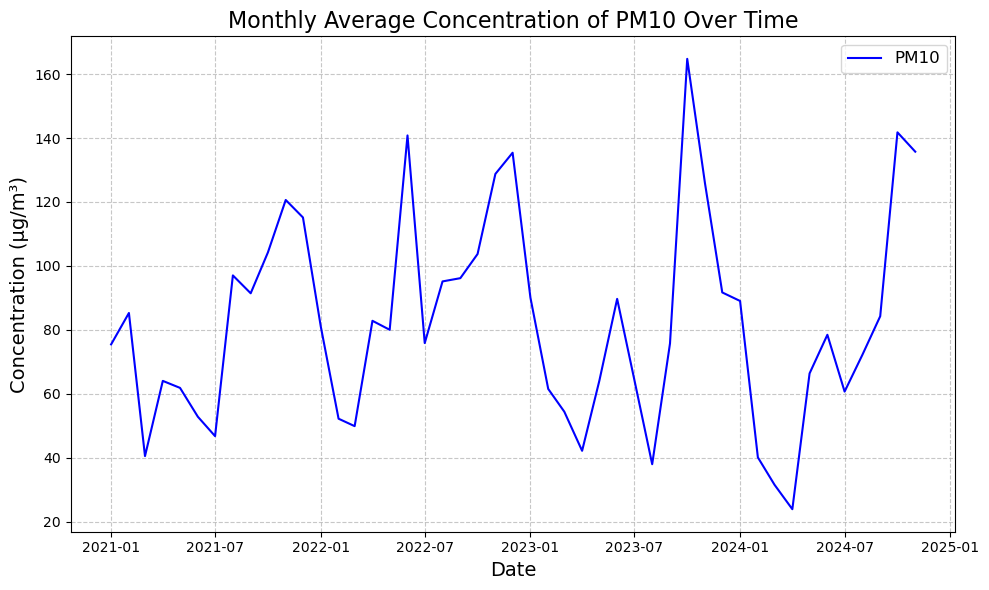

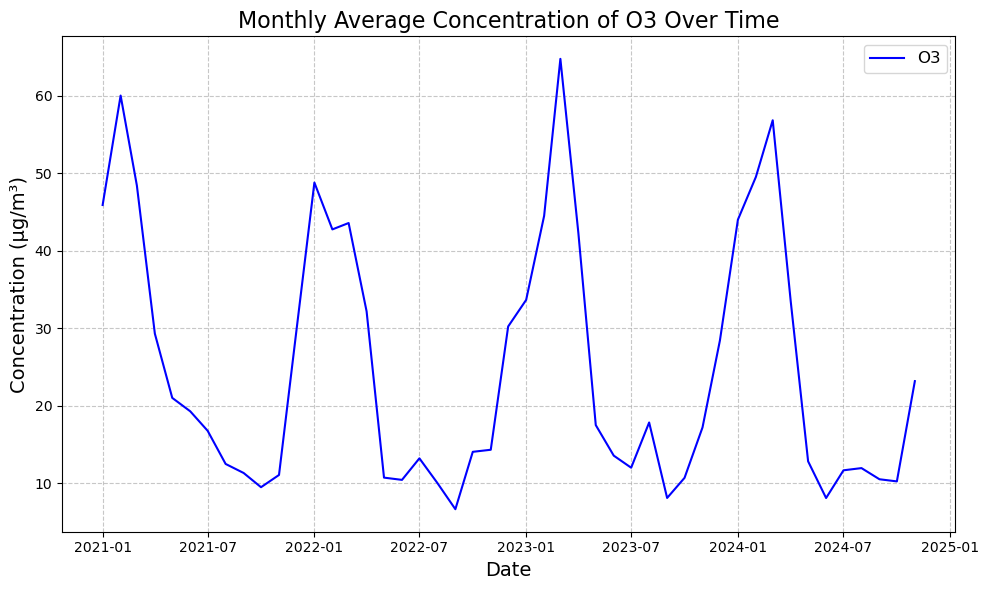

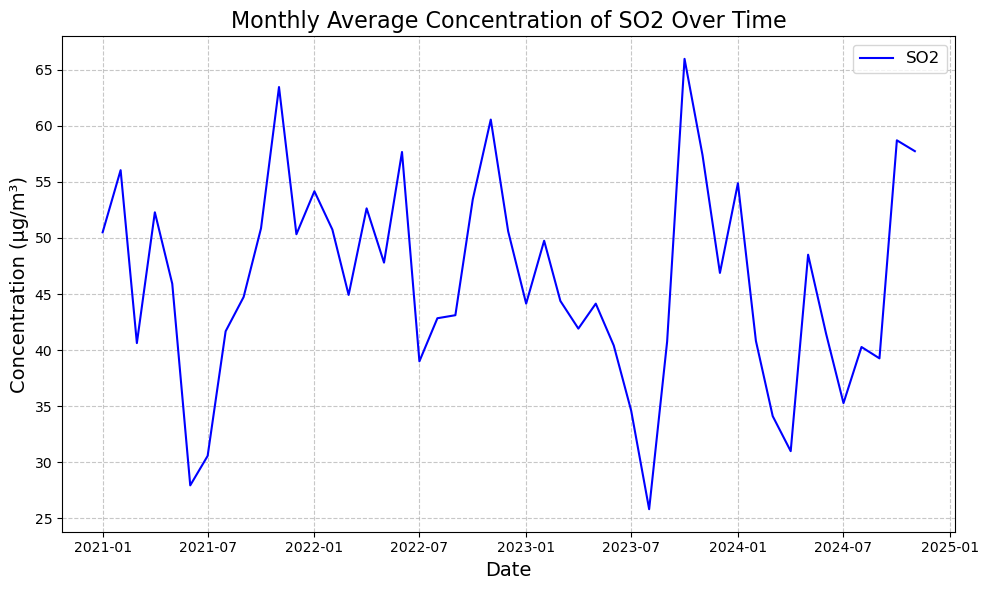

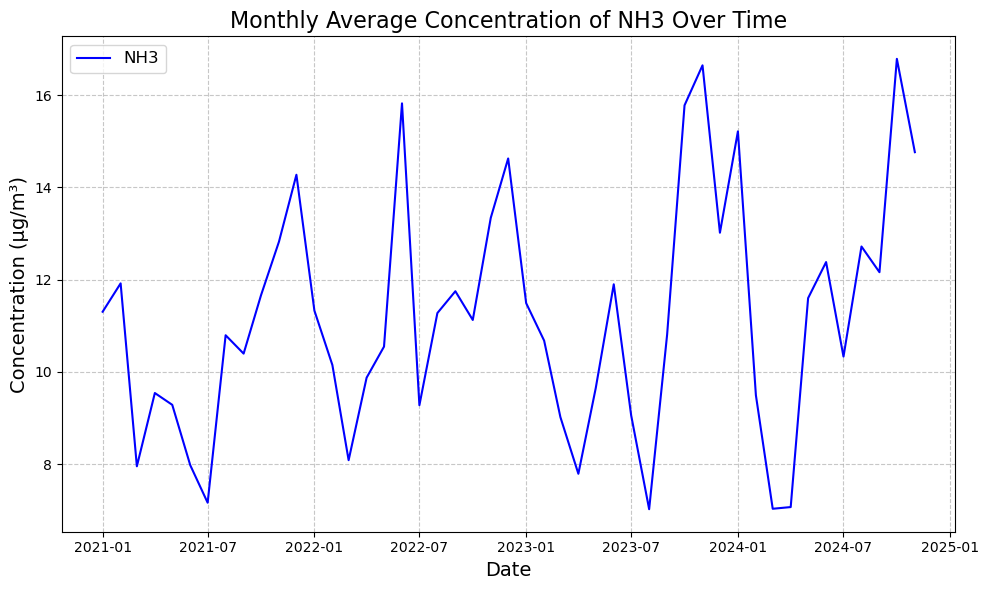

In [5]:


# Plot line charts for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg['date'], monthly_avg[pollutant], label=pollutant.upper(), color='blue')
    plt.title(f'Monthly Average Concentration of {pollutant.upper()} Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Concentration (µg/m³)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In general, through data analysis and visualization, we can see that the current air quality at HCM city over the years. Pollutants in the past 3 years have been  increasing a lot. Pollutants such as PM2_5, PM10, CO,... begin to increase around June and reach high in November.For example, in November 2022, CO was 2210.44 µg/m³, PM2.5 was 108.85 µg/m³, and PM10 was at 128.76 µg/m³. Similarly, in October 2023, CO spiked to 2981.86 µg/m³, with PM2.5 and PM10 levels close to 145.74 µg/m³ and 164.75 µg/m³, respectively.  Conversely, pollutants tend to decrease during the summer months (May–September), with July 2023 recording lower levels—CO at 1261.28 µg/m³, PM2.5 at 55.37 µg/m³, and PM10 at 64.34 µg/m³—likely due to better ventilation and rainfall aiding dispersion. Over the years, there is an observable deterioration in air quality, with 2023 and 2024 showing significantly higher pollutant levels compared to earlier years. These findings emphasize the need for further investigation to identify pollution sources, assess seasonal effects, and explore the influence of weather conditions on air quality.

### Question 2: What is the correlation level of the influencing factors on AQI?


- Answering question 2 helps identify how strongly different pollutants (such as PM2.5, CO, NO2, etc.) impact the Air Quality Index. By analyzing the correlation coefficients, we can determine which factors have the most significant effect on AQI, whether the relationship is positive or negative, and the strength of these relationships. This insight is crucial for understanding air quality dynamics, informing policy decisions, and guiding efforts to reduce pollution and improve public health.

- Steps to answer this question:

    - Create a list containing the names of columns that do not affect AQI and create a new dataframe from the original df that excludes those columns.
    - Use the corr() function to calculate the correlation matrix for each pair of columns. Then, extract the correlation coefficients of the columns that influence AQI.
    - Visualize the results.

In [6]:
df = pd.read_csv('../Data/air_pollution_cleaned.csv')
df.dtypes

dt        object
aqi        int64
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

In [7]:
# Convert the 'dt' column to datetime if it is not already
df['dt'] = pd.to_datetime(df['dt'])
df1=df.copy()

In [8]:
# Extract the columns that do not affect AQI
columns_to_exclude = ['dt']

# Remove the selected columns
selected_df = df1.drop(columns=columns_to_exclude)

# Calculate the correlation matrix with the 'aqi' column.
correlation_matrix = selected_df.corr()
correlation_matrix

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
aqi,1.000000,0.567394,0.513296,0.482355,-0.061197,0.558435,0.590828,0.605171,0.472291
co,0.567394,1.000000,0.901921,0.478121,-0.274069,0.570820,0.955458,0.964179,0.822507
no,0.513296,0.901921,1.000000,0.294290,-0.321595,0.612755,0.863726,0.866311,0.738643
no2,0.482355,0.478121,0.294290,1.000000,-0.126224,0.757518,0.491413,0.501630,0.427565
o3,-0.061197,-0.274069,-0.321595,-0.126224,1.000000,-0.074312,-0.170180,-0.185534,-0.235746
so2,0.558435,0.570820,0.612755,0.757518,-0.074312,1.000000,0.573722,0.580123,0.588663
pm2_5,0.590828,0.955458,0.863726,0.491413,-0.170180,0.573722,1.000000,0.996448,0.780250
pm10,0.605171,0.964179,0.866311,0.501630,-0.185534,0.580123,0.996448,1.000000,0.795723
nh3,0.472291,0.822507,0.738643,0.427565,-0.235746,0.588663,0.780250,0.795723,1.000000


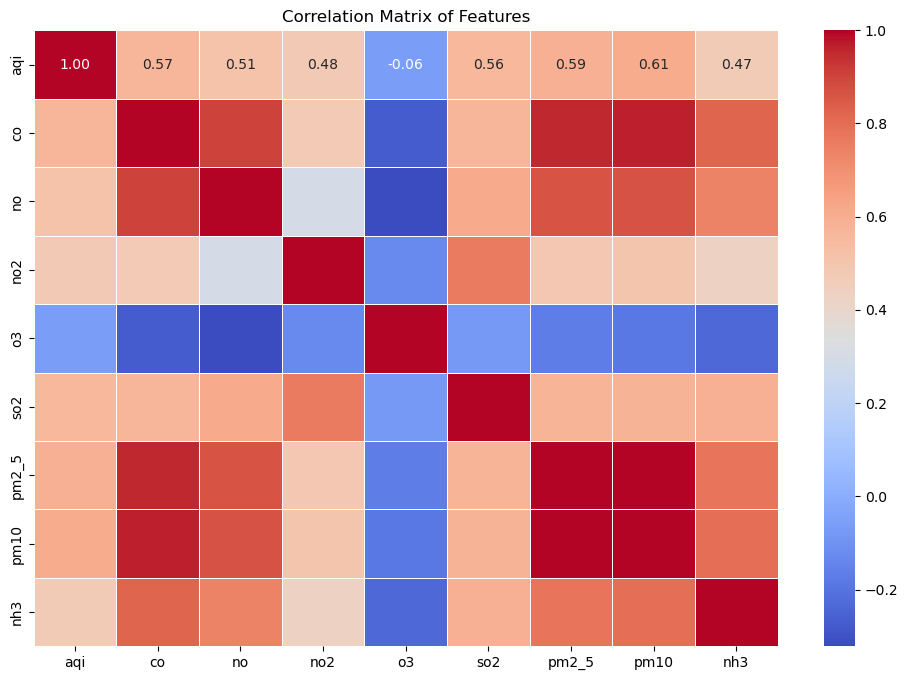

In [9]:
# VisualizeVisualize
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

The correlation matrix reveals significant relationships among air quality parameters, shedding light on their contributions to air pollution. AQI shows strong positive correlations with PM2.5 (0.59), PM10 (0.61), and CO (0.57), highlighting these pollutants as primary drivers of poor air quality. Moderate correlations with NO (0.51) and SO2 (0.56) suggest their secondary influence. Interestingly, AQI has a weak negative correlation with O3 (-0.06), indicating ozone’s less direct impact on overall air quality. CO is strongly linked with PM2.5 (0.96), PM10 (0.96), and NO (0.90), suggesting shared sources such as vehicular emissions and industrial activities.

Particulate matter (PM2.5 and PM10) is almost perfectly correlated (0.99), reflecting their shared sources and behaviors. Both are also strongly tied to CO, NO, and NH3, reinforcing their origins in combustion and industrial processes. Ozone (O3) demonstrates negative correlations with most pollutants, including CO (-0.27) and NO (-0.32), due to its secondary nature and photochemical behavior in the atmosphere.

#### Question 3: What is average PM2.5 and PM10 Concentrations by Hour of the Day

Answering this question provides insights into the daily patterns of PM2.5 and PM10 concentrations. It helps identify specific times of the day when pollution levels are higher, which can be linked to human activities such as morning and evening traffic or industrial operations. This analysis can also reveal periods of relatively cleaner air, offering valuable information for public health advisories, outdoor activity planning, and policy-making to mitigate air pollution during peak hours.

- Steps to answer this question:

    - Group Data by Hour of the day 
    - Calculate Averages
    - Visualize the Data
Create a plot to visualize the hourly trends for PM2.5 and PM10.

In [10]:
df2=df.copy()
df2['hour'] = df2['dt'].dt.hour

In [11]:

# Group Data by Hour of the day 

hourly_pm_stats = df2.groupby('hour')[['pm2_5', 'pm10']]

# Calculate Averages
hourly_pm_stats=hourly_pm_stats.mean().reset_index()
hourly_pm_stats

,hour,pm2_5,pm10
0,0,84.596820,101.138935
1,1,69.518041,84.620781
2,2,67.749503,83.225919
3,3,67.156001,82.412656
4,4,40.877253,49.548517
5,5,34.886480,41.587835
6,6,34.567055,40.699354
7,7,33.875085,39.630533
8,8,34.496288,40.342491
9,9,34.567630,40.575302


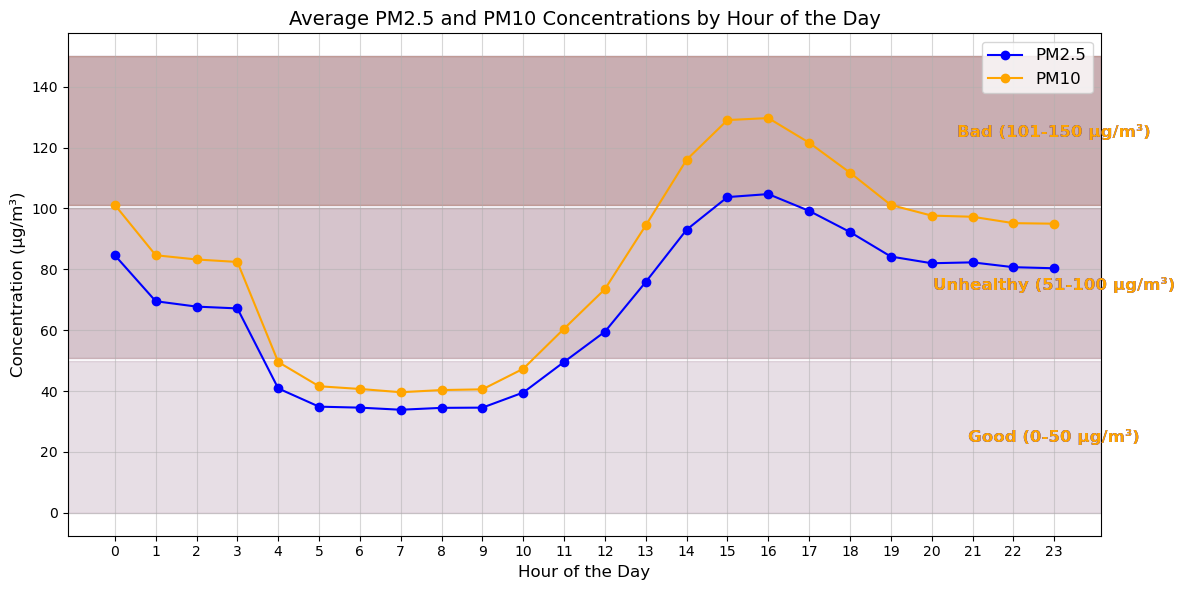

In [12]:

# Visualization 

plt.figure(figsize=(12, 6))

# Add Background Regions and Labels
# PM2.5
plt.axhspan(0, 50, color='blue', alpha=0.1)
plt.text(23, 25, 'Good (0-50 µg/m³)', color='blue', fontsize=12, ha='center', va='center', fontweight='bold')
plt.axhspan(51, 100, color='blue', alpha=0.2)
plt.text(23, 75, 'Unhealthy (51-100 µg/m³)', color='blue', fontsize=12, ha='center', va='center', fontweight='bold')
plt.axhspan(101, 150, color='blue', alpha=0.3)
plt.text(23, 125, 'Bad (101-150 µg/m³)', color='blue', fontsize=12, ha='center', va='center', fontweight='bold')


# PM10
plt.axhspan(0, 50, color='orange', alpha=0.1)
plt.text(23, 25, 'Good (0-50 µg/m³)', color='orange', fontsize=12, ha='center', va='center', fontweight='bold')
plt.axhspan(51, 100, color='orange', alpha=0.2)
plt.text(23, 75, 'Unhealthy (51-100 µg/m³)', color='orange', fontsize=12, ha='center', va='center', fontweight='bold')
plt.axhspan(101, 150, color='orange', alpha=0.3)
plt.text(23, 125, 'Bad (101-150 µg/m³)', color='orange', fontsize=12, ha='center', va='center', fontweight='bold')


# Draw the PM2_5 and PM10 lineline
plt.plot(hourly_pm_stats['hour'], hourly_pm_stats['pm2_5'], marker='o', label='PM2.5', color='blue')
plt.plot(hourly_pm_stats['hour'], hourly_pm_stats['pm10'], marker='o', label='PM10', color='orange')

# Set title and label 
plt.xticks(hourly_pm_stats['hour'])
plt.title('Average PM2.5 and PM10 Concentrations by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.grid(alpha=0.5)

# Display legend
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plotplot
plt.show()


The analysis of average PM2.5 and PM10 concentrations by hour of the day reveals distinct daily patterns. During the night and early morning hours (0:00–8:00), both PM2.5 and PM10 concentrations are relatively low, with PM2.5 ranging from 33 to 85 µg/m³ and PM10 from 39 to 101 µg/m³, reaching their lowest levels between 4:00 and 8:00. As daytime activities increase, concentrations rise significantly in the morning and early afternoon (9:00–13:00), with PM2.5 averaging 34 to 76 µg/m³ and PM10 at 40 to 94 µg/m³. The peak occurs in the late afternoon (14:00–17:00), where PM2.5 reaches up to 105 µg/m³ and PM10 nearly 130 µg/m³, likely due to heightened vehicular and industrial emissions combined with atmospheric conditions trapping pollutants. In the evening and night (18:00–23:00), concentrations gradually decline to 80–92 µg/m³ for PM2.5 and 95–111 µg/m³ for PM10 as activities decrease and cooler temperatures help disperse pollutants. This trend underscores the need for targeted mitigation strategies during peak hours and sustained efforts to address pollution levels throughout the day.

#### Question 4: What is average AQI by Day of the Week and Hour

Answering the question provides valuable insights into how air quality varies over time. By analyzing the data, we can identify patterns in AQI levels across different days and times, such as whether weekends generally have better air quality compared to weekdays or if certain hours, like early mornings or late evenings, show consistently higher or lower AQI values. This information can help policymakers, researchers, and the public understand the temporal dynamics of air pollution and develop targeted strategies to improve air quality during critical periods.

- Steps to answer this question:
    -  Extract day of the week and hour from the datetime column
    - Create a dataframe avg_aqi_by_day_hour to ccalculate the average AQI
    - Visualize the results with heatmapheatmap

In [13]:

# Extract day of the week and hour from the datetime column
df3=df.copy()
df3['day_of_week'] = df3['dt'].dt.day_name()
df3['hour'] = df3['dt'].dt.hour

# Calculate the average AQI for each combination of day of the week and hour

avg_aqi_by_day_hour = df3.groupby(['day_of_week', 'hour'])['aqi'].mean().reset_index()

# Pivot the data for heatmap plotting
pivot_table = avg_aqi_by_day_hour.pivot(index='day_of_week', columns='hour', values='aqi')


# Reorder the days of the week for proper display
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

pivot_table


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,3.984848,3.950739,3.886700,3.797030,3.216749,2.980296,2.965517,2.931034,2.935961,2.931034,...,4.103448,4.157635,4.118227,3.985222,3.906404,3.871921,3.935961,3.995074,4.034483,4.019704
Tuesday,4.152709,4.113861,4.064356,4.009901,3.371287,3.222772,3.267327,3.252475,3.227723,3.193069,...,4.069307,4.113861,4.094059,3.945545,3.891089,3.836634,3.861386,3.891089,3.905941,3.896040
Wednesday,3.985149,3.995025,4.000000,3.915423,3.388060,3.213930,3.218905,3.205000,3.199005,3.199005,...,4.054726,4.084577,4.054726,3.950249,3.890547,3.850746,3.895522,3.950249,3.950249,3.970000
Thursday,4.064677,4.024752,3.955446,3.871287,3.396040,3.277228,3.217822,3.202970,3.202970,3.108911,...,4.014851,4.064356,4.014851,3.861386,3.806931,3.772277,3.831683,3.851485,3.856436,3.846535
Friday,4.019704,4.019704,3.945813,3.842365,3.354680,3.206897,3.216749,3.187192,3.197044,3.182266,...,4.034483,4.034483,3.975369,3.876847,3.753695,3.669951,3.684729,3.684729,3.650246,3.635468
Saturday,3.719212,3.735000,3.725000,3.725000,3.220000,3.030000,3.010000,2.935000,2.920000,2.905000,...,3.795000,3.855000,3.785000,3.645000,3.595000,3.600000,3.640000,3.635000,3.635000,3.680000
Sunday,3.753769,3.696970,3.666667,3.585859,3.040404,2.878788,2.853535,2.833333,2.898990,2.858586,...,3.853535,3.838384,3.828283,3.702020,3.691919,3.696970,3.757576,3.838384,3.873737,3.898990


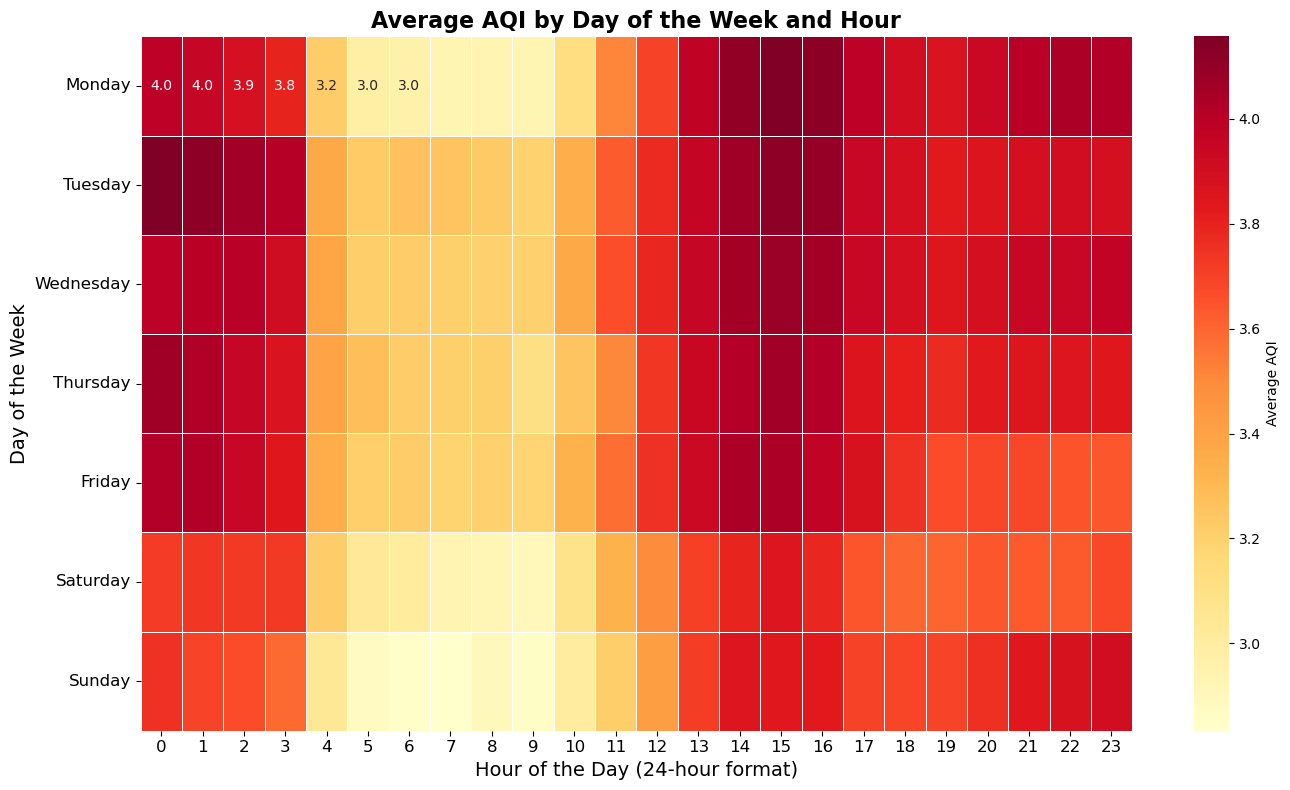

In [14]:
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Average AQI'})
plt.title('Average AQI by Day of the Week and Hour', fontsize=16, weight='bold')
plt.xlabel('Hour of the Day (24-hour format)', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

The air quality throughout the week, based on AQI values, mostly fluctuates between 3.2 and 4.2, with average and poor levels dominating. During the weekdays, especially from morning to afternoon, AQI tends to be higher, ranging from 3.8 to 4.2, reflecting air pollution levels that are moderate to poor, primarily due to the impact of traffic and industrial activities. However, during the weekend, particularly on Sunday, air quality may slightly improve, with AQI ranging from 2.87 to 3.9, possibly due to reduced traffic and industrial activities. While there is some improvement over the weekend, air pollution remains a notable issue throughout the week, and measures to reduce pollution, such as limiting traffic during peak hours, increasing green spaces, and raising community awareness, are essential to improving air quality.

#### Question 5:  What is the average CO Concentration by Seasons

Answering the question reveals short-term trends and patterns in carbon monoxide levels. This analysis helps determine whether specific days consistently have higher or lower CO concentrations, which could be linked to recent events or seasonal changes. Such insights are valuable for assessing the effectiveness of pollution control measures, identifying potential pollution sources, and planning immediate actions to mitigate risks to public health. Additionally, it provides a baseline for monitoring future changes in CO levels over similar timeframes.

- Steps to answer this question:
    - Create Month and season column
    - Create a new dataframe group by month and season, then calculate mean CO
    - Visualize the results

In [15]:
# Convert the 'dt' column to datetime
df
df['dt'] = pd.to_datetime(df['dt'], unit='s')  # Assuming 'dt' is in UNIX time

# Extract month and season information
df['month'] = df['dt'].dt.month
df['season'] = df['month'].apply(lambda x: 'Spring' if x in [1, 2, 3] 
                                  else 'Summer' if x in [4, 5, 6] 
                                  else 'Fall' if x in [7, 8, 9] 
                                  else 'Winter')

# Group by month and season, then calculate mean CO 
monthly_aqi = df.groupby('month')['co'].mean()
seasonal_aqi = df.groupby('season')['co'].mean().reindex([ 'Spring', 'Summer', 'Fall','Winter'])
monthly_aqi 

month
1     1395.973881
2     1037.843005
3      796.590654
4     1051.677174
5     1400.642853
6     1722.237707
7     1256.502105
8     1502.841856
9     1724.675653
10    2413.710708
11    2390.121064
12    2012.554991
Name: co, dtype: float64

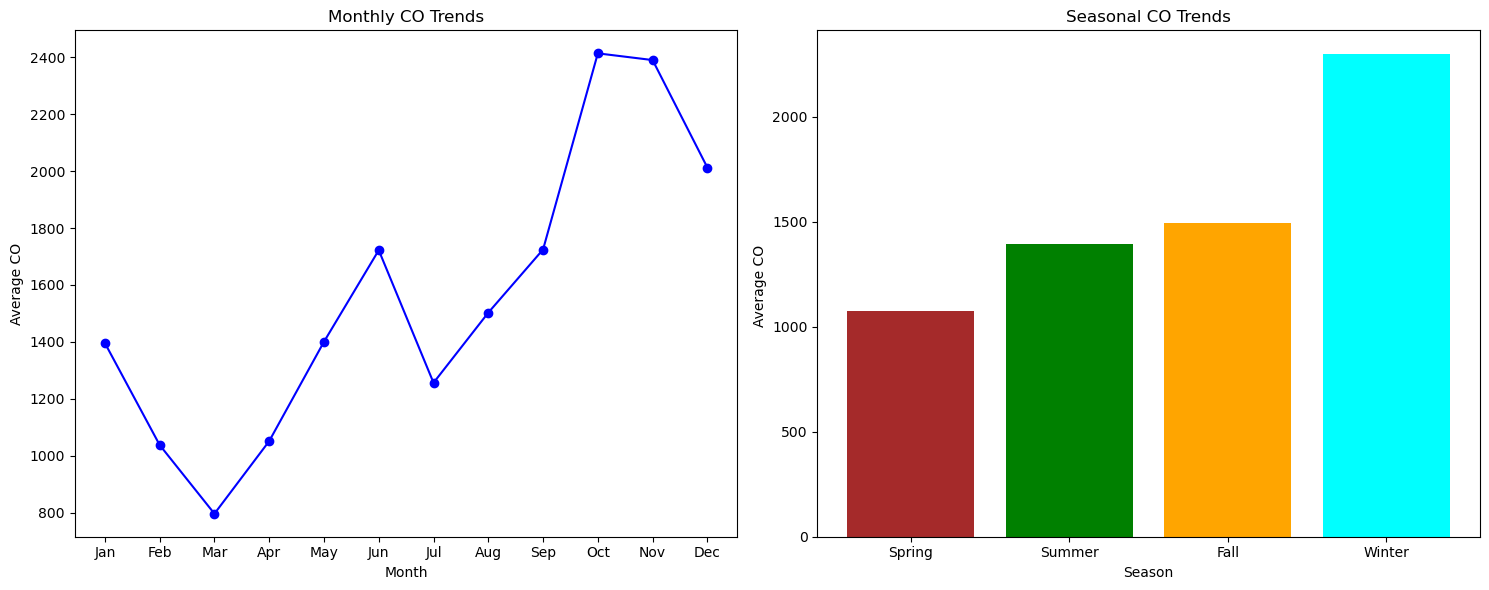

In [16]:

# Plotting the trends
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Monthly CO
axes[0].plot(monthly_aqi.index, monthly_aqi.values, marker='o', color='blue')
axes[0].set_title('Monthly CO Trends')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average CO')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Seasonal CO
axes[1].bar(seasonal_aqi.index, seasonal_aqi.values, color=['brown', 'green', 'orange', 'cyan'])
axes[1].set_title('Seasonal CO Trends')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average CO ')

plt.tight_layout()
plt.show()

Based on the average CO concentration across the seasons, we can observe a clear trend of increasing CO levels as the year progresses. In the spring, the CO concentration is the lowest at 1076.43, likely due to milder weather and reduced industrial or traffic activity. During the summer, the CO concentration rises to 1391.65, reflecting a slight increase in traffic and industrial activities. The fall season sees an even higher concentration of 1492.90, possibly due to agricultural activities, such as crop burning, and atmospheric conditions that limit pollutant dispersion. The highest CO concentration occurs in the winter, with 2296.51, likely due to increased fuel consumption for heating and the trapping of pollutants in colder, denser air. Overall, the CO levels tend to rise from spring to winter, with winter being the most concerning season for air quality. This highlights the need for attention to environmental issues, particularly in colder months when CO concentrations can pose significant health risks.